#単純回帰分析
『Rによる計量経済学』第3章「単純回帰分析」をPythonで実行する。  
テキスト付属データセット(「k031.csv」等)については出版社サイトよりダウンロードしてください。  
また、以下の説明は本書の一部を要約したものですので、より詳しい説明は本書を参照してください。   

In [1]:
%matplotlib inline

In [2]:
# -*- coding:utf-8 -*-
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# データ読み込み
data = pd.read_csv('example/k031.csv')
data

,i,X,Y
0,1,1,3
1,2,2,5
2,3,4,7
3,4,9,9


In [4]:
# 説明変数設定
X = data[['X']]
X = sm.add_constant(X)
X

,const,X
0,1,1
1,1,2
2,1,4
3,1,9


In [5]:
# 被説明変数設定
Y = data['Y']
Y

0    3
1    5
2    7
3    9
Name: Y, dtype: int64

In [6]:
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     16.10
Date:                Sun, 19 Jul 2015   Prob (F-statistic):             0.0569
Time:                        04:03:05   Log-Likelihood:                -4.4896
No. Observations:                   4   AIC:                             12.98
Df Residuals:                       2   BIC:                             11.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.2632      0.861      3.789      0.0

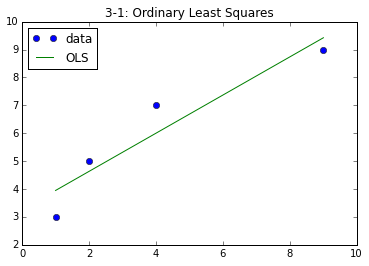

In [7]:
# グラフ生成
plt.plot(data["X"], data["Y"], 'o', label="data")
plt.plot(data["X"], results.fittedvalues, label="OLS")
plt.xlim(min(data["X"])-1, max(data["X"])+1)
plt.ylim(min(data["Y"])-1, max(data["Y"])+1)
plt.title('3-1: Ordinary Least Squares')
plt.legend(loc=2)
plt.show()